# 像素矩阵显示成图片

In [258]:
from PIL import Image
import numpy as np
import math
import random

In [84]:
def matrix_to_image(data):
    new_im = Image.fromarray(data.astype(np.uint8))
    return new_im

In [86]:
def generate_matrix():
    m = 100
    n = 100
    arr = []
    for i in range(m):
        tmp = []
        for j in range(n):
            y = i / m
            tmp.append((int(i/m*255),int(i/m*255),int((m-i)/m*255)))
        arr.append(tmp)
    return np.array(arr)

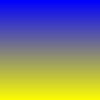

In [173]:
arr=generate_matrix()
matrix_to_image(arr)

In [309]:
class Vector:
    
    def __init__(self,vec):
        self.vec = vec
    
    def __neg__(self):
        arr = []
        for v in  self.vec:
            arr.append(-1*v)
        return Vector(arr)
    
    def __mul__(self,other):
        if isinstance(other,Vector):
            arr = []
            for v1,v2 in zip(self.vec,other.vec):
                arr.append(v1*v2)
            return Vector(arr)
        elif isinstance(other,(int,float)):
            arr = []
            for v in self.vec:
                arr.append(v*other)
            return Vector(arr)
    
    def __add__(self,other):
        arr = []
        for v1,v2 in zip(self.vec,other.vec):
            arr.append(v1+v2)
        return Vector(arr)
        
    def __sub__(self,other):
        arr = []
        for v1,v2 in zip(self.vec,other.vec):
            arr.append(v1-v2)
        return Vector(arr)
    
    def __len__(self):
        return len(vec)
    
    def __getitem__(self,idx):
        return self.vec[idx]
    
    def length(self):
        return math.sqrt(dot(self,self))
    
    def unit(self):
        l = self.length()
        return self*(1/l) if l > 0 else Vector([0,0,0])
    
    def __repr__(self):
        return "Vector({})".format(self.vec)
    

def dot(v1,v2):
    return sum((v1*v2).vec)

def random_vec():
    return Vector([random.random(),random.random(),random.random()]).unit()

def cross(v1,v2):
    v1_x,v1_y,v1_z = v1.vec
    v2_x,v2_y,v2_z = v2.vec
    return Vector([v1_y*v2_z-v1_z*v2_y,v1_z*v2_x-v1_x*v2_z,v1_x*v2_y-v1_y*v2_x])

In [312]:
v1 = Vector([0,0,1])
v2 = Vector([0,1,0])
print(v1+v2)
print(v1*v2)
print(v1-v2)
print(v2*2.5)
print(dot(v1,v2))
print(random_vec())
print(cross(v1,v2))

Vector([0, 1, 1])
Vector([0, 0, 0])
Vector([0, -1, 1])
Vector([0.0, 2.5, 0.0])
0
Vector([0.594478958092548, 0.6416905477422677, 0.48459055843405263])
Vector([-1, 0, 0])


In [303]:
class Sphere:
    
    def __init__(self,loc,radius,materia):
        self.loc = loc
        self.radius = radius
        self.materia = materia

In [482]:
class RetangleXY:
    
    def __init__(self,x1,y1,x2,y2,materia):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.materia = materia

        
        

In [418]:
class Ray:
    
    def __init__(self,origin,direct):
        self.origin = origin
        self.direct = direct

def reflect(v,n):
    v = v.unit()
    n = n.unit()
    q = dot(v,-n)
    return v+n*(2*q)

def refraction1(v,n,alpha):
    v = v.unit()
    n = n.unit()
    cos_theta1 = dot(v,-n)
    if abs(cos_theta1 - 1) < 1e-5:
        cos_theta1 = 1
    sin_theta1 = math.sqrt(1-cos_theta1**2)
    sin_theta2 = sin_theta1 / alpha
    if sin_theta2 >= 1:
        return None
    cos_theta2 = math.sqrt(1-sin_theta2**2)
    v1 = -n 
    v2 = v1 + n*cos_theta1
    v2 = v2.unit()
    r = v1*cos_theta2 + v2*sin_theta2
    r = r.unit()
    return r

def refraction(ray_in, normal, theta):
    v = -normal.unit()
    l = dot(ray_in, v)
    u = ray_in -  v*l
    u = u.unit()
    cos = dot(ray_in.unit(), v)
    sin = math.sqrt(1 - cos * cos)
    sin_t = sin / theta
    if sin_t >= 1:
        return None
    cos_t = math.sqrt(1 - sin_t * sin_t)
    tan_t = sin_t / cos_t
    return (v + u * tan_t).unit()

In [272]:
def hit(ray,sphere):
    v1 = ray.origin - sphere.loc
    a = dot(ray.direct,ray.direct)
    b = 2*dot(v1,ray.direct)
    c = dot(v1,v1)-sphere.radius**2
    delta = b*b-4*a*c
    if delta < 0:
        return False,None,None,None
    t = (-b+math.sqrt(delta))/(2*a)
    if t >= 0:
        t1 = (-b-math.sqrt(delta))/(2*a)
        if t1 >= 0:
            t = min(t1,t)
        p = ray.origin + ray.direct*t
        n = p - sphere.loc
        return True,t,p,n
    return False,None,None,None

In [479]:
def hit_list(ray,sphere_list):
    t_min = 10000000
    r_is_hit = False
    t_t = None
    r_p = None
    r_n = None
    obj = None
    for sphere in sphere_list:
        is_hit,t,p,n = hit(ray,sphere)
        if is_hit:
            if t_min > t and t > 0.0000001:
                t_min = t
                r_is_hit = True
                r_p = p
                r_t = t
                r_n = n
                obj = sphere
    return r_is_hit,t_t,r_p,r_n,obj

def texture(p,r):
    x,y,z = p.vec
    n = 30 if r < 1 else 25
    o = math.sin(x*n)*math.sin(y*n)*math.sin(z*n)
    if o > 0:
        return Vector([0.5,0.3,0.7])
    else:
        return Vector([0.4,0.7,0.2])

In [515]:
def ray_color(ray,world,depth):
    if depth > 30:
        return Vector([0,0,0])
    is_hit,t,p,n,obj = hit_list(ray,world)
    if is_hit:
        n = n.unit()
        d = n + random_vec()*0.7
        attr,name,nature = obj.materia
        if name == '漫反射':
            if nature == '发光体':
                return Vector([1.0,1.0,1.0])*texture(p,obj.radius)
            return  ray_color(Ray(p,d),world,depth+1)*texture(p,obj.radius)
        if name == '反射':
            f = reflect(ray.direct,n)
            return  ray_color(Ray(p,f),world,depth+1)*attr
        if name == '折射':
            alpha = 0.8
            if dot(ray.direct,n) < 0:
                #从外向内
                r = refraction(ray.direct,n,alpha)
                if r is None:
                    r = reflect(ray.direct,n)
            else:
                #由内向外
                r = refraction(ray.direct,-n,1/alpha)
                if r is None:
                    r = reflect(ray.direct,-n)
            return  ray_color(Ray(p,r),world,depth+1)

    x,y,z = ray.direct
    t = 0.5*(y + 1.0)
    return Vector([0.7, 0.7, 0.7])*(1.0-t) + Vector([0.3, 0.4, 0.8])*t

In [307]:
def clamp(x,l,r):
    if x < l:
        return l
    if x > r:
        return r
    return math.sqrt(x)
def make_color(color):
    x,y,z = color.vec
    return Vector([clamp(x,0,1)*255,clamp(y,0,1)*255,clamp(z,0,1)*255])

In [328]:
class Camera:
    def __init__(self,eye,target,up,h_w):
        w = eye - target
        w = w.unit()
        u = cross(up,w)
        u = u.unit()
        v = cross(w,u)
        v = v.unit()
        self.eye = eye
        self.uu = u
        self.vv = v*h_w
        self.ww = w
        self.left_bottom = self.eye-self.ww-self.uu*0.5-self.vv*0.5
    
    def get_ray(self,x,y):
        p = self.left_bottom + self.uu*x + self.vv*y
        return Ray(self.eye,p-self.eye)

In [ ]:
origin = Vector([1,2,1])
target = Vector([-0.5,1,-0.8])
up = Vector([0,1,0])
h_w = 1.0
w = 800
h = int(w*h_w)
camera = Camera(origin,target,up,h_w)
sphere1 = Sphere(Vector([-2,0.6,-1]),0.6,(Vector([0.3,0.6,0.2]),'漫反射',''))
sphere2 = Sphere(Vector([-1.5,0.5,-2]),0.5,(Vector([0.8,0.8,0.8]),'折射',''))
sphere4 = Sphere(Vector([-0.2,0.6,-2]),0.6,(Vector([0.8,0.8,0.8]),'反射',''))
sphere3 = Sphere(Vector([0,-10,0]),10,(Vector([0.4,0.7,0.5]),'漫反射','发光体'))
sphere5 = Sphere(Vector([-0.3,1.5,-1]),0.3,(Vector([0.4,0.7,0.5]),'漫反射','发光体'))
world = []
world.append(sphere1)
world.append(sphere2)
world.append(sphere3)
world.append(sphere4)
world.append(sphere5)
arr = []
num=10
for i in range(h):
    tmp = []
    for j in range(w):
        co = Vector([0,0,0])
        for k in range(num):
            ray = camera.get_ray((j+random.random())/w,1-(i+random.random())/h)
            color = ray_color(ray,world,0)
            co = co + color
        co = co * (1/num)
        color = make_color(co)
        tmp.append(color)
    arr.append(tmp)
arr = np.array(arr)
matrix_to_image(arr)